In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os
%matplotlib inline

In [2]:
od.download("https://www.kaggle.com/competitions/sa2022/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubhamkumar9984
Your Kaggle Key: ········


100%|██████████| 675k/675k [00:02<00:00, 231kB/s]


Extracting archive .\sa2022/sa2022.zip to .\sa2022


In [3]:
os.listdir("sa2022")

['Sample__submission.csv', 'test.csv', 'train.csv']

In [43]:
train_df=pd.read_csv("sa2022/train.csv")
test_df=pd.read_csv("sa2022/test.csv")
sample_df=pd.read_csv("sa2022/Sample__submission.csv")

In [44]:
train_df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [45]:
train_corr=train_df.corr()

In [46]:
train_corr["price1"]

id            0.004378
Rating        0.291511
price1        1.000000
actprice1     0.889304
norating1    -0.045184
noreviews1   -0.040171
star_5f      -0.040196
star_4f      -0.031649
star_3f      -0.056558
star_2f      -0.071090
star_1f      -0.070024
fulfilled1    0.256335
Name: price1, dtype: float64

In [47]:
X=train_df.drop(columns=["id","title","price1","Offer %"])
y=train_df["price1"]

In [48]:
X.head()

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.9,Women,Flipkart,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,3.8,Men,Flipkart,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,4.4,Women,Flipkart,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,4.2,Men,Flipkart,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,3.9,Men,Flipkart,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


In [49]:
y.head()

0     698
1     999
2    2749
3     518
4    1379
Name: price1, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (11011, 12)
X_test (4719, 12)
y_train (11011,)
y_test (4719,)


In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [51]:
imputer=SimpleImputer(strategy="mean")
scaler=StandardScaler()
encoder=OneHotEncoder(sparse=False,handle_unknown="ignore")

In [52]:
numeric_cols=X.select_dtypes(include="number").columns
categorical_cols=X.select_dtypes(include="object").columns

In [53]:
X_num=X[numeric_cols]
X_cat=X[categorical_cols]

In [56]:
X_train[X_num.columns]=imputer.fit_transform(X_train[X_num.columns])
X_test[X_num.columns]=imputer.fit_transform(X_test[X_num.columns])

In [57]:
X_train[X_num.columns]=scaler.fit_transform(X_train[X_num.columns])
X_test[X_num.columns]=scaler.fit_transform(X_test[X_num.columns])

In [58]:
X_train[encoder.get_feature_names_out(X_cat.columns)]=encoder.fit_transform(X_train[X_cat.columns])
X_test[encoder.get_feature_names_out(X_cat.columns)]=encoder.fit_transform(X_test[X_cat.columns])

In [62]:
X_train=X_train.drop(columns=["maincateg","platform"])
X_test=X_test.drop(columns=["maincateg","platform"])

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
model=DecisionTreeRegressor()

In [63]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mean_squared_error(y_test,model.predict(X_test))

157636.45977971528

In [67]:
mean_squared_error(y_train,model.predict(X_train))

687.3034433910876

In [68]:
train_errs=[]
test_errs=[]
for k in range(1,30):
    estimator=DecisionTreeRegressor(max_depth=k)
    estimator.fit(X_train,y_train)
    train_err=mean_squared_error(y_train,estimator.predict(X_train))
    test_err=mean_squared_error(y_test,estimator.predict(X_test))
    train_errs.append(train_err)
    test_errs.append(test_err)

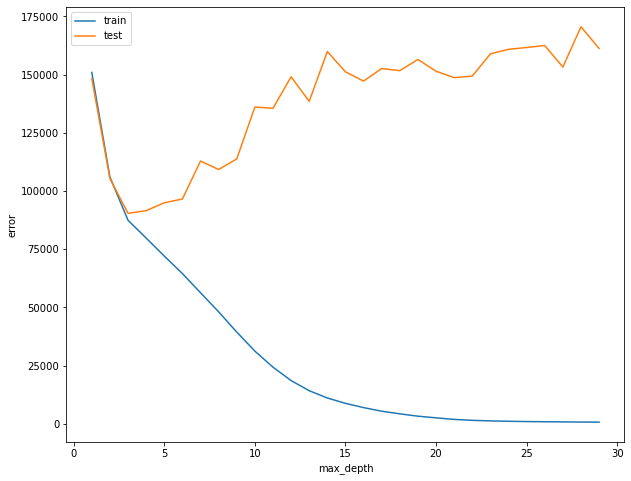

In [70]:
plt.figure(figsize=(10,8))
plt.plot(range(1,30),train_errs)
plt.plot(range(1,30),test_errs)
plt.xlabel("max_depth")
plt.ylabel("error")
plt.legend(["train","test"])

In [71]:
best_model=DecisionTreeRegressor(max_depth=3)

In [72]:
best_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [73]:
mean_squared_error(y_test,best_model.predict(X_test))

90420.9861175017

In [74]:
mean_squared_error(y_train,best_model.predict(X_train))

87438.14115410944

In [75]:
test_df

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,14033,Women Off White Flats Sandal,NaN,Women,Flipkart,699,1235,153,NaN,323,155,62,NaN,1
5240,297,Slip On For Men (Tan),3.9,Men,Flipkart,1993,329,56,350.0,37,60,5,37.0,0
5241,18733,Women Grey Heels Sandal,3.8,Women,Flipkart,999,1280,135,574.0,290,172,94,150.0,0
5242,6162,Womens Casual Comfort Stylish Black High Heel ...,3.9,Women,Flipkart,499,4867,574,2384.0,974,648,328,533.0,0


In [76]:
test=test_df.drop(columns=["id","title"])

In [77]:
test

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5239,NaN,Women,Flipkart,699,1235,153,NaN,323,155,62,NaN,1
5240,3.9,Men,Flipkart,1993,329,56,350.0,37,60,5,37.0,0
5241,3.8,Women,Flipkart,999,1280,135,574.0,290,172,94,150.0,0
5242,3.9,Women,Flipkart,499,4867,574,2384.0,974,648,328,533.0,0


In [79]:
test[X_num.columns]=imputer.fit_transform(test[X_num.columns])
test[X_num.columns]=scaler.fit_transform(test[X_num.columns])
test[encoder.get_feature_names_out(X_cat.columns)]=encoder.fit_transform(test[X_cat.columns])

In [80]:
test

,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,maincateg_nan,platform_Amazon,platform_Flipkart
0,-0.713176,Men,Flipkart,-0.296490,1.936287,1.636973,1.938831e+00,1.222161,1.899232,2.959104,3.645587,0.808863,1.0,0.0,0.0,0.0,1.0
1,-0.375321,Women,Flipkart,-0.686960,0.002051,-0.006015,-1.520466e-02,0.005756,0.024895,0.045601,0.049783,0.808863,0.0,1.0,0.0,0.0,1.0
2,-0.375321,Women,Flipkart,-0.296490,-0.197172,-0.190255,-2.031163e-01,-0.190514,-0.174789,-0.198282,-0.220764,0.808863,0.0,1.0,0.0,0.0,1.0
3,-0.375321,Men,Flipkart,1.265390,-0.209517,-0.196536,-2.165713e-01,-0.196867,-0.188265,-0.224471,-0.234537,0.808863,1.0,0.0,0.0,0.0,1.0
4,-0.375321,Men,Flipkart,-0.296490,-0.043911,-0.046841,-4.471397e-02,-0.075494,-0.038808,-0.018234,0.036993,-1.236304,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,0.000000,Women,Flipkart,-0.530772,-0.136147,-0.137391,3.476497e-17,-0.105921,-0.123337,-0.150815,0.000000,0.808863,0.0,1.0,0.0,0.0,1.0
5240,-0.375321,Men,Flipkart,0.479764,-0.206489,-0.188162,-1.846156e-01,-0.201548,-0.181527,-0.244112,-0.229618,-1.236304,1.0,0.0,0.0,0.0,1.0
5241,-0.713176,Women,Flipkart,-0.296490,-0.132653,-0.146812,-1.503665e-01,-0.116955,-0.112924,-0.098437,-0.118448,-1.236304,0.0,1.0,0.0,0.0,1.0
5242,-0.375321,Women,Flipkart,-0.686960,0.145840,0.082965,1.263789e-01,0.111748,0.178640,0.284574,0.258349,-1.236304,0.0,1.0,0.0,0.0,1.0


In [81]:
test_input=test.drop(columns=["maincateg","platform"])

In [82]:
test_input

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Women,maincateg_nan,platform_Amazon,platform_Flipkart
0,-0.713176,-0.296490,1.936287,1.636973,1.938831e+00,1.222161,1.899232,2.959104,3.645587,0.808863,1.0,0.0,0.0,0.0,1.0
1,-0.375321,-0.686960,0.002051,-0.006015,-1.520466e-02,0.005756,0.024895,0.045601,0.049783,0.808863,0.0,1.0,0.0,0.0,1.0
2,-0.375321,-0.296490,-0.197172,-0.190255,-2.031163e-01,-0.190514,-0.174789,-0.198282,-0.220764,0.808863,0.0,1.0,0.0,0.0,1.0
3,-0.375321,1.265390,-0.209517,-0.196536,-2.165713e-01,-0.196867,-0.188265,-0.224471,-0.234537,0.808863,1.0,0.0,0.0,0.0,1.0
4,-0.375321,-0.296490,-0.043911,-0.046841,-4.471397e-02,-0.075494,-0.038808,-0.018234,0.036993,-1.236304,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,0.000000,-0.530772,-0.136147,-0.137391,3.476497e-17,-0.105921,-0.123337,-0.150815,0.000000,0.808863,0.0,1.0,0.0,0.0,1.0
5240,-0.375321,0.479764,-0.206489,-0.188162,-1.846156e-01,-0.201548,-0.181527,-0.244112,-0.229618,-1.236304,1.0,0.0,0.0,0.0,1.0
5241,-0.713176,-0.296490,-0.132653,-0.146812,-1.503665e-01,-0.116955,-0.112924,-0.098437,-0.118448,-1.236304,0.0,1.0,0.0,0.0,1.0
5242,-0.375321,-0.686960,0.145840,0.082965,1.263789e-01,0.111748,0.178640,0.284574,0.258349,-1.236304,0.0,1.0,0.0,0.0,1.0


In [83]:
best_model.predict(test_input)

array([502.26075679, 317.22982158, 502.26075679, ..., 502.26075679,
       317.22982158, 502.26075679])

In [91]:
pd.DataFrame({"id":test_df["id"],"price1":best_model.predict(test_input)})

,id,price1
0,2242,502.260757
1,20532,317.229822
2,10648,502.260757
3,20677,1530.386555
4,12593,502.260757
...,...,...
5239,14033,502.260757
5240,297,866.089806
5241,18733,502.260757
5242,6162,317.229822
